In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor
import torch as th
import stable_baselines3
import os
from plottingCode import *
import os
from IPython.display import clear_output
from gymEnv import droneLanding

In [2]:
# model = stable_baselines3.PPO.load("First PPO Model.zip")
clear_output(False)
log_dir = "/temp/gym/"
os.makedirs(log_dir, exist_ok=True)
env = droneLanding()
# Vectorised env should be much faster, When i run it on my local machine it has a value error 
# when i run this in a google collab file it works perfectly. Give it a crack 
# env = make_vec_env(droneLanding, n_envs=5)
env = Monitor(env, log_dir)
model = PPO("MlpPolicy", env=env)
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir, name = 'Best Model',verbose=1)
model.learn(total_timesteps=20000, callback=callback)

Num timesteps: 2000
Best mean reward: -553.50 - Last mean reward per episode: -555.25


In [4]:
callback.log_dir

'/temp/gym/'

In [ ]:
model.learn(total_timesteps=5000000, progress_bar=True, callback=callback)

In [ ]:
model.save('First PPO Model')

In [ ]:
print('scripa')
os.system('clear')

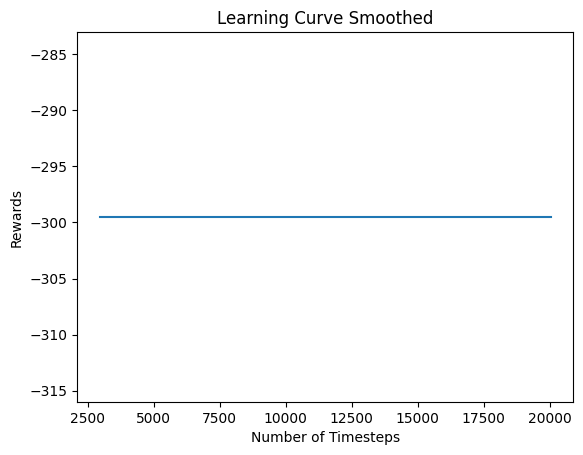

In [3]:
plot_results(log_dir)